In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

input_folder = r'D:/eNTERFACE/wav_files'

emotion_pitch_values = {}  

for file in os.listdir(input_folder):
    if file.endswith('.wav'):
        filepath = os.path.join(input_folder, file)
        y, sr = librosa.load(filepath, sr=None)

       
        pitch = librosa.yin(y, fmin=50, fmax=500)
        avg_pitch = np.mean(pitch)

        try:
            emotion = file.split('_')[1].lower()
        except IndexError:
            continue  

        if emotion not in emotion_pitch_values:
            emotion_pitch_values[emotion] = []
        emotion_pitch_values[emotion].append(avg_pitch)


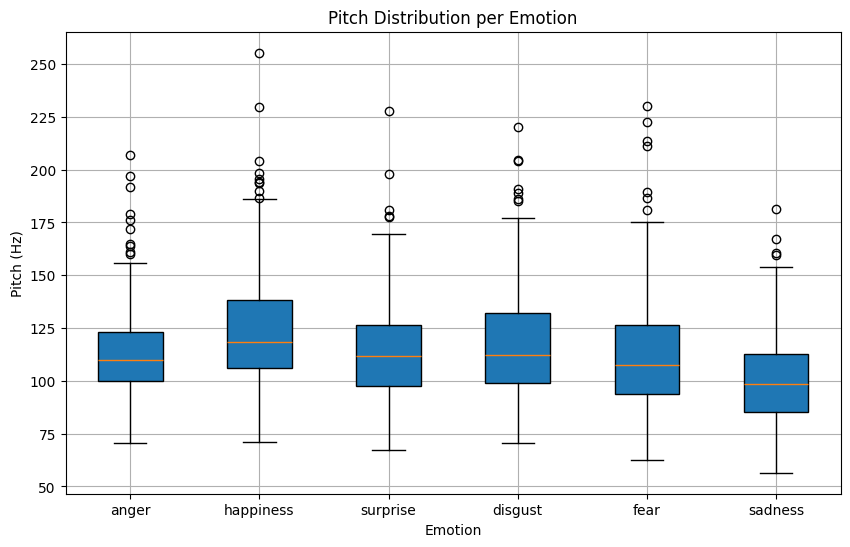

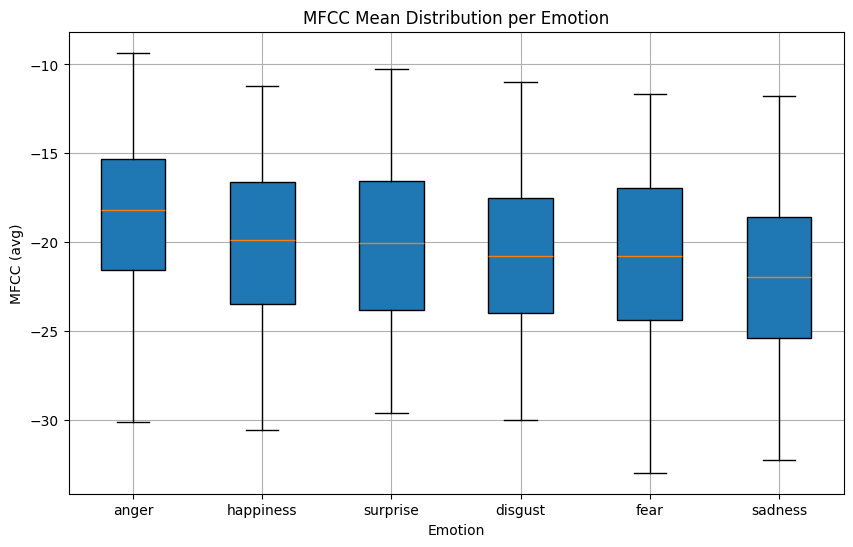

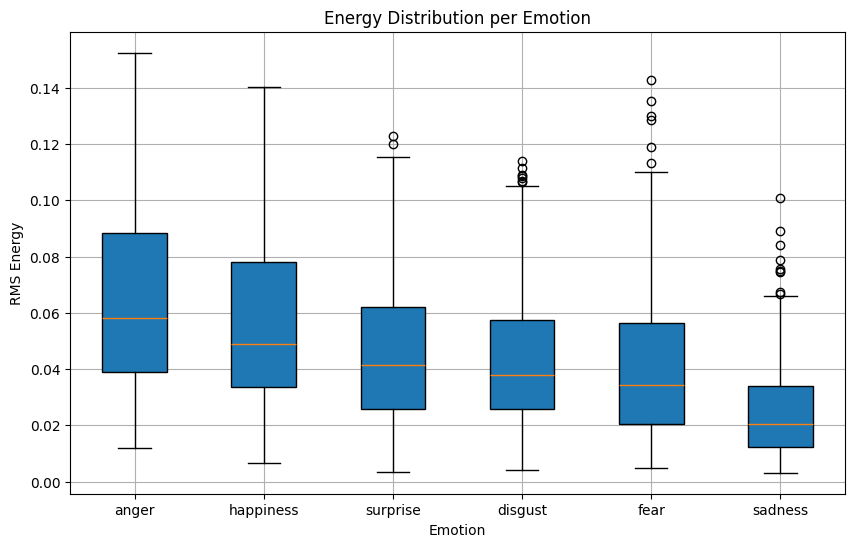

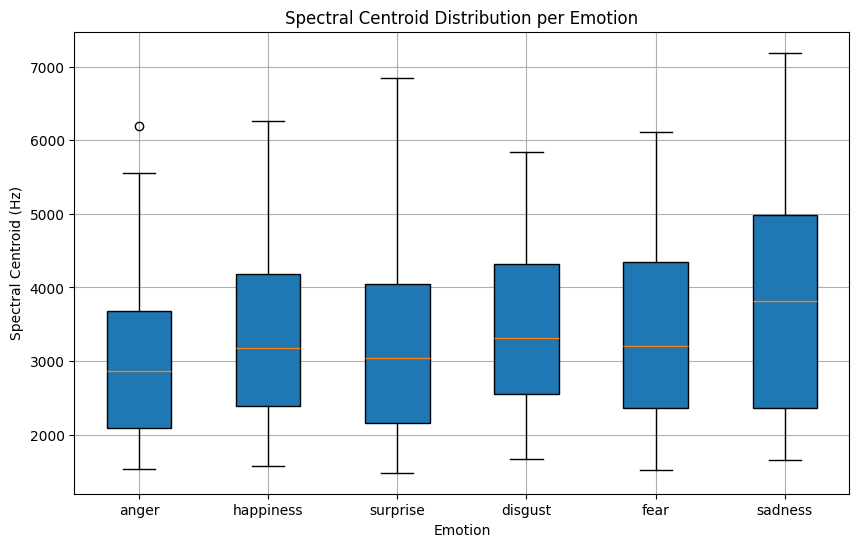

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

input_folder = r'D:/eNTERFACE/wav_files'

emotion_classes = {
    'anger': 0,
    'happiness': 1,
    'surprise': 2,
    'disgust': 3,
    'fear': 4,
    'sadness': 5
}
ordered_emotions = list(emotion_classes.keys())


emotion_pitch = {e: [] for e in ordered_emotions}
emotion_mfcc = {e: [] for e in ordered_emotions}
emotion_rms = {e: [] for e in ordered_emotions}
emotion_centroid = {e: [] for e in ordered_emotions}

for file in os.listdir(input_folder):
    if file.endswith('.wav'):
        filepath = os.path.join(input_folder, file)
        try:
            y, sr = librosa.load(filepath, sr=None)

           
            emotion = file.split('_')[1].lower()
            if emotion not in ordered_emotions:
                continue

            # Pitch
            pitch = librosa.yin(y, fmin=50, fmax=500)
            avg_pitch = np.mean(pitch)

            # MFCC
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            avg_mfcc = np.mean(mfccs)

            # RMS Energy
            rms = librosa.feature.rms(y=y)
            avg_rms = np.mean(rms)

            # Spectral Centroid
            centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            avg_centroid = np.mean(centroid)

            emotion_pitch[emotion].append(avg_pitch)
            emotion_mfcc[emotion].append(avg_mfcc)
            emotion_rms[emotion].append(avg_rms)
            emotion_centroid[emotion].append(avg_centroid)

        except Exception as e:
            print(f"Error processing {file}: {e}")
            continue


def plot_feature_distribution(feature_dict, ylabel, title):
    plt.figure(figsize=(10, 6))
    data = [feature_dict[e] for e in ordered_emotions]
    plt.boxplot(data, labels=ordered_emotions, patch_artist=True)
    plt.ylabel(ylabel)
    plt.xlabel("Emotion")
    plt.title(title)
    plt.grid(True)
    plt.show()

# 📊 عرض الـ features
plot_feature_distribution(emotion_pitch, "Pitch (Hz)", "Pitch Distribution per Emotion")
plot_feature_distribution(emotion_mfcc, "MFCC (avg)", "MFCC Mean Distribution per Emotion")
plot_feature_distribution(emotion_rms, "RMS Energy", "Energy Distribution per Emotion")
plot_feature_distribution(emotion_centroid, "Spectral Centroid (Hz)", "Spectral Centroid Distribution per Emotion")


✅ CSV saved to: D:/eNTERFACE/audio_features.csv


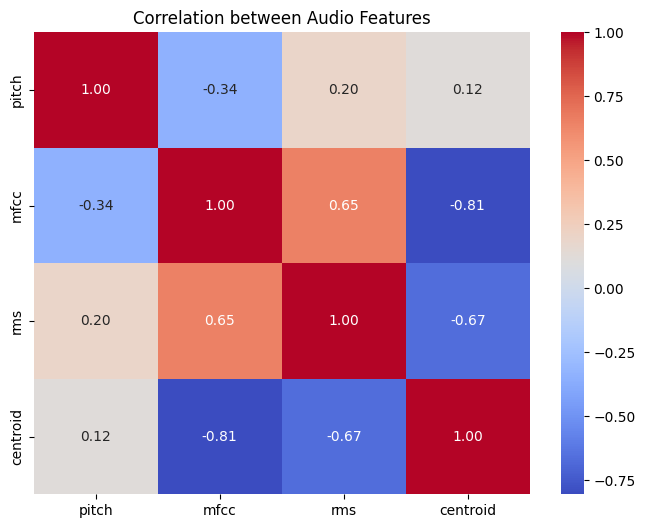

In [ ]:
import pandas as pd
import seaborn as sns

data = []

for emotion in ordered_emotions:
    length = len(emotion_pitch[emotion])  
    for i in range(length):
        data.append({
            'emotion': emotion,
            'pitch': emotion_pitch[emotion][i] if i < len(emotion_pitch[emotion]) else np.nan,
            'mfcc': emotion_mfcc[emotion][i] if i < len(emotion_mfcc[emotion]) else np.nan,
            'rms': emotion_rms[emotion][i] if i < len(emotion_rms[emotion]) else np.nan,
            'centroid': emotion_centroid[emotion][i] if i < len(emotion_centroid[emotion]) else np.nan
        })

df = pd.DataFrame(data)

output_csv = r"D:/eNTERFACE/audio_features.csv"
df.to_csv(output_csv, index=False)
print(f"✅ CSV saved to: {output_csv}")

plt.figure(figsize=(8, 6))
corr = df.drop('emotion', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Audio Features")
plt.show()
